In [1]:
!ls ./data

data_description.txt   test.csv   train_preprocessed.csv
sample_submission.csv  train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv("./data/train.csv")

In [4]:
test_df = pd.read_csv("./data/test.csv")

In [5]:
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.shape

(1460, 81)

In [10]:
#check for null values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

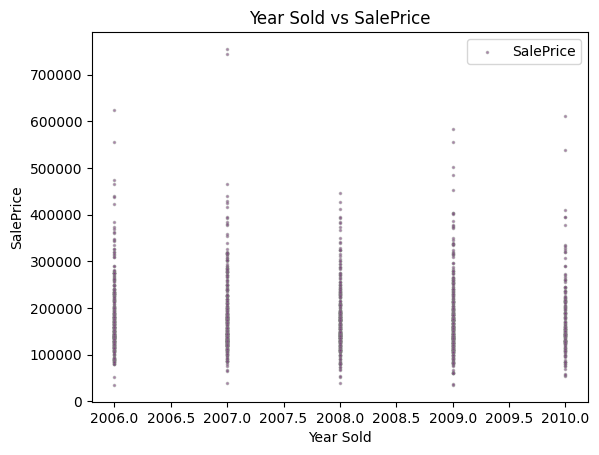

In [12]:
# plot years sold vs price
fig,ax = plt.subplots()
ax.scatter(df['YrSold'],df['SalePrice'], alpha=0.5, s=10, c='purple', marker='.', label='SalePrice', edgecolors='grey')
ax.set_xlabel('Year Sold')
ax.set_ylabel('SalePrice')
ax.legend(['SalePrice'])
ax.set_title('Year Sold vs SalePrice')
plt.show()

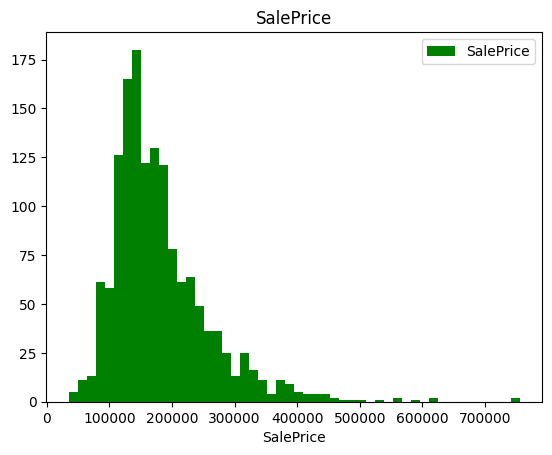

In [13]:
# plot hist of sale price
fig,ax = plt.subplots()
ax.hist(df['SalePrice'], bins=50,  color='green')
ax.set_xlabel('SalePrice')
ax.legend(['SalePrice'])
ax.set_title('SalePrice')
plt.show()

In [14]:
df['YrSold']

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

In [15]:
# sort data by YrSold 
df.sort_values(by='YrSold', inplace=True, ascending=True)

In [16]:
df['YrSold']

781     2006
1219    2006
281     2006
569     2006
1220    2006
        ... 
353     2010
1322    2010
162     2010
158     2010
1284    2010
Name: YrSold, Length: 1460, dtype: int64

In [17]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000
571,572,20,RL,60.0,7332,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,120000
1223,1224,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,137900
577,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Abnorml,164500
270,271,60,FV,84.0,10728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,266000
976,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500


In [18]:
# copy original data in df_temp
df_temp = df.copy()

In [19]:
df_temp.head(10) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000
571,572,20,RL,60.0,7332,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,120000
1223,1224,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,137900
577,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Abnorml,164500
270,271,60,FV,84.0,10728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,266000
976,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your training data
# regressor = RandomForestRegressor()
# regressor.fit(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])  



In [21]:
for label, column in df_temp.iteritems():
    if pd.api.types.is_string_dtype(column):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [22]:
for label, column in df_temp.iteritems():
    if pd.api.types.is_string_dtype(column):
        df_temp[label] = column.astype('category').cat.as_ordered()

In [23]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 781 to 1284
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   

In [24]:
df_temp.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000
571,572,20,RL,60.0,7332,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,120000
1223,1224,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,137900
577,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Abnorml,164500
270,271,60,FV,84.0,10728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,266000
976,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500


In [25]:
df_temp.Street.cat.categories

Index(['Grvl', 'Pave'], dtype='object')

In [26]:
df_temp.Street.cat.codes

781     1
1219    1
281     1
569     1
1220    1
       ..
353     1
1322    1
162     1
158     1
1284    1
Length: 1460, dtype: int8

In [27]:
# check missing data percentage
df_temp.isnull().sum()/len(df_temp)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [28]:
# save preprossed data    
df_temp.to_csv('./data/train_preprocessed.csv', index=False) 


In [29]:
for label, column in df_temp.iteritems():
    if pd.api.types.is_numeric_dtype(column):
        print(label)


Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [30]:
# check which numeric columns have missing data
for label, column in df_temp.items():
    if pd.api.types.is_numeric_dtype(column):
        if pd.isnull(column).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [31]:
# fill numeric columns with median
for label, column in df_temp.items():
    if pd.api.types.is_numeric_dtype(column):
        if pd.isnull(column).sum():
            # df_temp[label+"_is_missing"] = pd.isnull(column)
            df_temp[label] = column.fillna(column.median())


In [32]:
len(df_temp)

1460

In [33]:
df_temp.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [34]:
# check which numeric columns have missing data
for label, column in df_temp.items():
    if pd.api.types.is_numeric_dtype(column):
        if pd.isnull(column).sum():
            print(label)

In [35]:
df_temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,69.0,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,354,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,105900
1322,1323,60,RL,107.0,10186,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000
162,163,20,RL,95.0,12182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,New,Partial,220000
158,159,60,FV,100.0,12552,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2010,WD,Normal,254900


In [36]:
df_temp['Alley'].isna().sum()

1369

In [37]:
type(df_temp['Alley'])

pandas.core.series.Series

In [38]:
# check for column which are not numeric
for label, column in df_temp.items():
    if not pd.api.types.is_numeric_dtype(column):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [39]:
pd.Categorical(df_temp['Alley']).codes + 1

array([0, 0, 2, ..., 0, 0, 0], dtype=int8)

In [40]:
test_df = df_temp.copy()

In [41]:
# check for column which are not numeric
for label, column in test_df.items():
    if not pd.api.types.is_numeric_dtype(column):
        # test_df[label+"_is_missing"] = pd.isnull(column)
        test_df[label] = pd.Categorical(column).codes + 1

In [42]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,4,65.0,7153,2,0,4,4,1,...,0,0,0,0,0,7,2006,9,5,175900
1219,1220,160,5,21.0,1680,2,0,4,4,1,...,0,0,0,0,0,4,2006,9,1,91500
281,282,20,2,60.0,7200,2,2,4,4,1,...,0,0,0,0,0,5,2006,7,6,185000
569,570,90,4,69.0,7032,2,0,1,4,1,...,0,0,0,0,0,12,2006,9,5,135960
1220,1221,20,4,66.0,7800,2,0,1,4,1,...,0,0,0,0,0,11,2006,9,1,115000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,354,30,5,60.0,8520,2,0,4,4,1,...,0,0,0,0,0,5,2010,9,5,105900
1322,1323,60,4,107.0,10186,2,0,1,4,1,...,0,0,0,0,0,6,2010,9,5,190000
162,163,20,4,95.0,12182,2,0,4,4,1,...,0,0,0,0,0,5,2010,7,6,220000
158,159,60,2,100.0,12552,2,0,4,4,1,...,0,0,2,0,0,5,2010,9,5,254900


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 781 to 1284
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  Overal

In [44]:
test_df.head().T

,781,1219,281,569,1220
Id,782.0,1220.0,282.0,570.0,1221.0
MSSubClass,60.0,160.0,20.0,90.0,20.0
MSZoning,4.0,5.0,2.0,4.0,4.0
LotFrontage,65.0,21.0,60.0,69.0,66.0
LotArea,7153.0,1680.0,7200.0,7032.0,7800.0
...,...,...,...,...,...
MoSold,7.0,4.0,5.0,12.0,11.0
YrSold,2006.0,2006.0,2006.0,2006.0,2006.0
SaleType,9.0,9.0,7.0,9.0,9.0
SaleCondition,5.0,1.0,6.0,5.0,1.0


In [45]:
%%time 
model = RandomForestRegressor(random_state=42)
model.fit(test_df.drop('SalePrice', axis=1), test_df['SalePrice'])

CPU times: user 3.18 s, sys: 5.51 ms, total: 3.19 s
Wall time: 3.26 s


RandomForestRegressor(random_state=42)

In [46]:
# find score
model.score(test_df.drop('SalePrice', axis=1), test_df['SalePrice'])

0.9813418270698655

In [47]:
# import split_train_test
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(test_df.drop('SalePrice', axis=1), test_df['SalePrice'], test_size=0.2, random_state=42)

In [48]:
# create evaluation function uses root_mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))


In [49]:
# create function to evaluate model on few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_test, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_test, val_preds),
        "Training R^2": model.score(X_train, y_train),
        "Valid R^2": model.score(X_test, y_test)
    }
    return scores


In [50]:
%%time
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

CPU times: user 2 s, sys: 20.1 ms, total: 2.03 s
Wall time: 2.09 s


RandomForestRegressor(random_state=42)

In [51]:
# score 
model.score(X_test, y_test)

0.8861548382552007

In [52]:
show_scores(model)

{'Training MAE': 6552.375282534246,
 'Valid MAE': 18038.46965753425,
 'Training RMSLE': 10895.360341223455,
 'Valid RMSLE': 27319.739283302064,
 'Training R^2': 0.9809846568581342,
 'Valid R^2': 0.8861548382552007}

In [53]:
# import test data 
df_test = pd.read_csv('./data/test.csv')

In [54]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [55]:
# test_preds = model.predict(df_test)

In [56]:
# sort data by YrSold 
df_test.sort_values(by='YrSold', inplace=True, ascending=True)

In [57]:
for label, column in df_test.iteritems():
    if pd.api.types.is_string_dtype(column):
        df_test[label] = column.astype('category').cat.as_ordered()

In [58]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
1250,2711,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,...,0,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal
1251,2712,60,RL,105.0,11025,Pave,NaN,Reg,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
1252,2713,120,FV,34.0,3628,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1253,2714,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1568,60,RL,NaN,17082,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
106,1567,30,RL,94.0,9259,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
105,1566,20,RL,NaN,20062,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
103,1564,90,RL,NaN,7424,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [59]:
# fill numeric columns with median
for label, column in df_test.items():
    if pd.api.types.is_numeric_dtype(column):
        if pd.isnull(column).sum():
            # df_test[label+"_is_missing"] = pd.isnull(column)
            df_test[label] = column.fillna(column.median())


In [60]:
# check for column which are not numeric
for label, column in df_test.items():
    if not pd.api.types.is_numeric_dtype(column):
        # df_test[label+"_is_missing"] = pd.isnull(column)
        df_test[label] = pd.Categorical(column).codes + 1

In [61]:
test_df.shape
# df_test.shape

(1460, 81)

In [62]:
df_test.shape

(1459, 80)

In [63]:
%%time 
model = RandomForestRegressor(random_state=42)
model.fit(test_df.drop('SalePrice', axis=1), test_df['SalePrice'])

CPU times: user 2.85 s, sys: 17 ms, total: 2.87 s
Wall time: 2.94 s


RandomForestRegressor(random_state=42)

In [64]:
model.score(test_df.drop('SalePrice', axis=1), test_df['SalePrice'])


0.9813418270698655

In [69]:
test_preds = model.predict(df_test)

In [66]:
# how the column are diff
set(test_df.columns) - set(df_test.columns)

{'SalePrice'}

In [70]:
df_preds = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': test_preds})

In [71]:
df_preds

,Id,SalePrice
1458,2919,233888.15
1250,2711,284350.90
1251,2712,355119.52
1252,2713,178048.29
1253,2714,149341.92
...,...,...
107,1568,225209.94
106,1567,79985.34
105,1566,220460.76
103,1564,162354.91


In [72]:
df_preds.to_csv('./data/submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f19998a7-824c-4349-849a-b5eecbdc5b7b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>